# Let's use BaseMap to visualize the optimized routes

In [1]:
import pandas as pd
import time

In [2]:
factors = pd.read_csv('factors.csv')
routes = pd.read_csv('routes_v2.csv')
cities = pd.read_csv('cities.csv')
orders = pd.read_csv('orders.csv')
pack = pd.read_csv('packages.csv')
price = pd.read_csv('pricing.csv')
trucks = pd.read_csv('trucks.csv')
wareh = pd.read_csv('warehouses.csv')

In [3]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calcule la distance en kilomètres entre deux points (lon1, lat1) et (lon2, lat2) 
    sur une sphère (la Terre) en utilisant la formule de Haversine.
    """
    # Conversion des latitudes et longitudes en radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Calcul des différences de latitude et de longitude
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Calcul de la distance en kilomètres
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6371 * c
    return km

# Initialisation du dataframe 'distance' avec les noms de villes en index et en colonnes
disti = pd.DataFrame(index=cities['city'], columns=cities['city'])

# Calcul de la distance en kilomètres entre chaque paire de villes
for i in cities.index:
    for j in cities.index:
        disti.loc[cities.loc[i,'city'], cities.loc[j,'city']] = haversine(cities.loc[i,'lng'], cities.loc[i,'lat'], cities.loc[j,'lng'], cities.loc[j,'lat'])

# Conversion des distances en nombres décimaux arrondis à 2 décimales
disti = disti.astype(float).round(6)
disti

city,Paris,Nice,Toulouse,Marseille,Rennes,Grenoble,Nantes,Montpellier,Lyon,Rouen,...,Niort,Sarcelles,Pantin,Lorient,Le Blanc-Mesnil,Beauvais,Maisons-Alfort,Hyères,Épinay-sur-Seine,Meaux
city,,,,,,,,,,,,,,,,,,,,,
Paris,0.000000,685.932701,588.157822,660.494275,308.328951,482.786159,342.702025,594.827948,392.047741,112.669040,...,351.637357,15.596691,5.734735,439.934995,12.126891,66.475147,8.436038,701.319641,11.416059,40.842015
Nice,685.932701,0.000000,468.448463,159.502510,847.433143,204.133979,790.410398,272.813797,298.349843,793.316192,...,673.356422,697.442290,687.505298,938.435488,688.901861,749.113323,677.709069,112.295156,696.722073,674.021104
Toulouse,588.157822,468.448463,0.000000,318.738626,556.669655,381.950351,464.863066,195.899592,359.849115,649.756396,...,337.637018,603.753847,593.030451,592.866625,598.252884,649.705773,583.378025,382.712483,598.674075,605.760183
Marseille,660.494275,159.502510,318.738626,0.000000,765.358589,210.382773,695.079110,125.498568,277.140982,757.981418,...,569.858194,674.123058,663.306103,840.465671,666.113807,726.691658,652.939839,64.769924,671.853507,658.095958
Rennes,308.328951,847.433143,556.669655,765.358589,0.000000,652.570095,100.147058,659.805278,559.699041,250.862716,...,219.173347,314.426918,312.935264,131.607318,318.353491,312.863401,313.123878,822.352762,308.149110,349.133825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beauvais,66.475147,749.113323,649.705773,726.691658,312.863401,546.714969,364.963437,661.134077,457.003665,72.798887,...,394.276357,52.600119,63.391145,442.454002,60.798387,0.000000,73.781662,766.919127,55.059244,77.796818
Maisons-Alfort,8.436038,677.709069,583.378025,652.939839,313.123878,474.635091,345.311605,588.029923,384.056777,121.059455,...,351.134506,21.512131,10.436289,444.695886,14.878265,73.781662,0.000000,693.506337,19.099178,37.151852
Hyères,701.319641,112.295156,382.712483,64.769924,822.352762,230.451203,754.762312,190.265890,310.947351,802.373811,...,630.799656,714.353224,703.753626,900.945363,706.126675,766.919127,693.506337,0.000000,712.564661,695.831497


# Visualisation

In [4]:
def get_latitude(city_name):
    latitude = cities.loc[cities['city'] == city_name, 'lat'].iloc[0]
    return latitude

In [5]:
def get_longitude(city_name):
    longitude = cities.loc[cities['city'] == city_name, 'lng'].iloc[0]
    return longitude

In [7]:
routes_avi = routes[routes.from_warehouse == 'Avignon']
pre_arrets = list(routes_avi.stops)
arrets=[]
for k in pre_arrets:
    arrets.append(k.split(' > '))
liste_villes = []  
liste_villes = set(ville for trajet in arrets for ville in trajet)

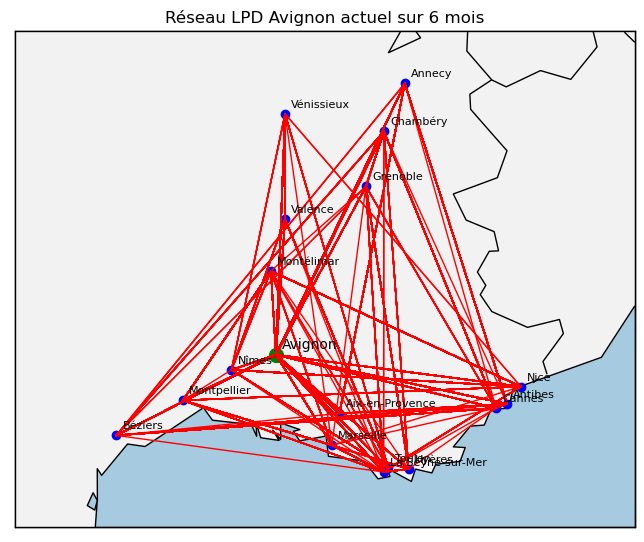

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Créer la carte de France
plt.figure(figsize=(8, 8))
map = Basemap(projection='lcc', resolution='l', width=5E5, height=4E5, lat_0=44.5, lon_0=5.3)

# Tracer les frontières et les côtes de la France
map.drawcoastlines()
map.drawcountries(linewidth=1, color='black')
map.fillcontinents(color='#f2f2f2', lake_color='#8080FF')
map.drawmapboundary(fill_color='#a6cae0')



# Tracer les villes visitées
for i in range(len(cities.city)):
    lat, lon = cities.lat[i], cities.lng[i]
    x, y = map(lon, lat)
    if cities.city[i]=='Avignon':
        plt.plot(x, y, 'go', markersize=10)
        plt.text(x+5000, y+5000, cities.city[i], fontsize=10)
    elif cities.city[i] in liste_villes:
        plt.plot(x, y, 'bo', markersize=6)
        plt.text(x+5000, y+5000, cities.city[i], fontsize=8)
    
# Tracer les trajets réalisés


for k in range(len(arrets)):
    for i in range(len(arrets[k])-1):
        start_city, end_city = arrets[k][i], arrets[k][i+1]
        start_lat, start_lon = get_latitude(start_city), get_longitude(start_city)
        end_lat, end_lon = get_latitude(end_city), get_longitude(end_city)
        start_x, start_y = map(float(start_lon), float(start_lat))
        end_x, end_y = map(float(end_lon), float(end_lat))
        plt.plot([start_x, end_x], [start_y, end_y], 'r', linewidth=1)
    
# Afficher la carte
plt.title('Réseau LPD Avignon actuel sur 6 mois')
plt.show()   